In [2]:
%%capture
from datetime import datetime
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

plt.rcParams.update({"font.size": 12})
%matplotlib inline

In [2]:
wsb_users_data = pd.read_csv("data/WSB_data_with_emb.csv",sep=';', usecols = ['created_utc','author','title','selftext'], low_memory = True)

In [3]:
stocks_users_data= pd.read_csv("stocks/data/stocks_submissions_all.csv",sep=';', usecols = ['created_utc','author','title','selftext'], low_memory = True)

In [4]:
investing_users_data= pd.read_csv("investing/data/investing_submissions_all.csv",sep=';', usecols = ['created_utc','author','title','selftext'], low_memory = True)

In [5]:
wsb_users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861752 entries, 0 to 861751
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   created_utc  861752 non-null  object
 1   author       861752 non-null  object
 2   selftext     223819 non-null  object
 3   title        861752 non-null  object
dtypes: object(4)
memory usage: 26.3+ MB


In [6]:
stocks_users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154506 entries, 0 to 154505
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   created_utc  154506 non-null  object
 1   author       154506 non-null  object
 2   selftext     132641 non-null  object
 3   title        154506 non-null  object
dtypes: object(4)
memory usage: 4.7+ MB


In [7]:
investing_users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127769 entries, 0 to 127768
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   created_utc  127769 non-null  object
 1   author       127769 non-null  object
 2   selftext     122158 non-null  object
 3   title        127767 non-null  object
dtypes: object(4)
memory usage: 3.9+ MB


In [ ]:
wsb_users_data.head(1)

In [183]:
stocks_users_data.head(1)

,created_utc,author,selftext,title
0,2021-11-26 13:19:32,NovelAnteater,,SNAP seems like a great long-term buy at this ...


In [ ]:
investing_users_data.head(5)

In [ ]:
investing_users_data['selftext'] =investing_users_data['selftext'].apply(lambda x: x if not x=='[removed]' else "" )

In [182]:
stocks_users_data['selftext'] =stocks_users_data['selftext'].apply(lambda x: x if not x=='[removed]' else "" )

In [ ]:
wsb_users_data['selftext'] =wsb_users_data['selftext'].apply(lambda x: x if not x=='[removed]' else "" )

## Create new features : Part of Speech, Bag of Words, Sentiment, Tickers

In [ ]:
!pip install SpacyTextBlob

In [184]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter, defaultdict

In [185]:
nlp = spacy.load("en_core_web_sm")#en_core_web_trf, _md

#nlp = spacy.blank("en")
if "spacytextblob" not in nlp.pipe_names:
    nlp.add_pipe("spacytextblob")
    nlp.rename_pipe("spacytextblob", "sentiment")
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner', 'sentiment']


In [186]:
doc = nlp("Apple is  looking at buying awesome U.K. great startup for $1 billion bought")

print(dict(Counter([token.pos_ for token in doc])))
#print(dict(Counter([token.tag_ for token in doc])))
#print(dict(Counter([ent.text for ent in doc.ents if ent.label_ =='ORG'])))   
print(dict(Counter([token.text for token in doc if token.pos_ =='VERB'])))  
print(dict(Counter([token.text for token in doc if token.pos_ =='ADJ'])))  
print(dict(Counter([token.text for token in doc if token.pos_ =='PROPN'])))  
print(dict(Counter([token.text for token in doc if token.pos_ =='NOUN']))) 
print(dict(Counter([token.text for token in doc if token.pos_ =='ADP']))) 
print(dict(Counter([token.text for token in doc if token.pos_ =='SYM']))) 
print(dict(Counter([token.text for token in doc if token.pos_ =='NUM']))) 
print(dict(Counter([token.text for token in doc if token.pos_ =='AUX']))) 
print (dict(Counter([token.lemma_ for token in doc])))

{'PROPN': 2, 'AUX': 1, 'SPACE': 1, 'VERB': 3, 'ADP': 2, 'ADJ': 2, 'NOUN': 1, 'SYM': 1, 'NUM': 2}
{'looking': 1, 'buying': 1, 'bought': 1}
{'awesome': 1, 'great': 1}
{'Apple': 1, 'U.K.': 1}
{'startup': 1}
{'at': 1, 'for': 1}
{'$': 1}
{'1': 1, 'billion': 1}
{'is': 1}
{'Apple': 1, 'be': 1, ' ': 1, 'look': 1, 'at': 1, 'buy': 2, 'awesome': 1, 'U.K.': 1, 'great': 1, 'startup': 1, 'for': 1, '$': 1, '1': 1, 'billion': 1}


In [2]:
nasdaq_stocks = pd.read_csv("data/nasdaq.csv", sep=",")
nasdaq_stocks_symbols = nasdaq_stocks["Symbol"].tolist()

In [ ]:
!pip install nltk

In [3]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [189]:
text = "Nick likes to play football, however he is not too fond of tennis."
text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

print(tokens_without_sw)

['Nick', 'likes', 'play', 'football', ',', 'however', 'fond', 'tennis', '.']


In [192]:
# Function to find stocks in a text given stock list
import re
regex = re.compile("[^a-zA-Z ]")
ticker_set = set(nasdaq_stocks_symbols)
#list(filter(lambda word: word[0]=='s', text.split()))
all_stopwords = stopwords.words('english')
all_stopwords= all_stopwords + ['good','big','nice','go','em','live','hear','plan', 'else',
                                'it','best','get','new','see','next',
                               'cash','well','post','two','real','play','hope','low','free','huge','open','pay','move','ever',
                                'love','tell','life','gain','tech','fund','bit','ago','fact','net','talk','turn','app','main',
                               'grow','kind','pump','beat','vs','true','ride','care','mind','man','link','via','job','safe',
                               'plus','wish','team','save','user','base','onto','view','eat','flow','jan','fun','info','car',
                               'peak','step','mark','five','cars','max','wave','cool','auto','six','loan','act','eye','roll','site',
                                'cost','form','dd','run','four','fast','gold','key','drug','bill','hi','game','age','hes',
                                'ryan','earn','uk','apps','sum','pays','rent','jobs','usa','self','coin','law','wash','blue'
                               ]
def calculate_mentioned_stocks(title, body=""):
    #content = regex.sub("", str(title) + " " + str(body)).split(" ")
    text = str(title) + " " + str(body)   
    tick_list = list(filter(lambda word: word[0]=='$', text.upper().split())) 
    #print(tick_list)
    content = set(list([i[1:] for i in tick_list]))
    #print(content)
    tickers = list(ticker_set & content)
    #print(tickers)
    tickers2 = [word for word in text.split() if not word.lower() in all_stopwords]
    #print(tickers2)
    tickers2 = [x.upper() for x in tickers2  if len(x) > 1]
    #print(tickers2)
    #print()
    return tickers +list(ticker_set & set(tickers2))



In [193]:
print(calculate_mentioned_stocks('TSLA  any aapl be $E  420.69 $TSLA is go GO is $msft else plan it get best hear new not big nice a good em CONFIRMED.Something,on live bb something'))

['E', 'TSLA', 'MSFT', 'AAPL', 'TSLA', 'BB']


In [194]:
def find_tickers(title, body=""):
    tickers = dict(Counter(calculate_mentioned_stocks(title,body)))    
    return tickers

In [4]:
import collections
from typing import Dict, List, Tuple


def text2bow(words: List[str], dictionary: Dict[str, int]):
    word_frequences = collections.defaultdict(int)
    for word in words:
        if word not in dictionary:
            dictionary[word] = len(dictionary)
        word_frequences[dictionary[word]] += 1
 
    #return list(word_frequences.items())
    return word_frequences

In [196]:
dictionary = {}
#print('BOW representation:', text2bow(sample_text.split(), dictionary))
#print('Dictionary:', dictionary)

In [197]:
def spacy_features(text, body=""):
    if(len(str(text).lower()+" "+ str(body).lower()) < 3689602):
       
        doc = nlp(str(text).lower()+" "+ str(body).lower())
        lemma_text = " ".join([token.lemma_ for token in doc])
        doc = nlp(lemma_text)
        #part_of_speech():
        ##count PROPN, VERB, ADP, NOUN, NUM
        pos = dict(Counter([token.pos_ for token in doc]))
        pos_tag = dict(Counter([token.tag_ for token in doc]))
        
        #Extract Nouns, Verbs and Adjectives
        
        nouns = dict(Counter([token.text for token in doc if token.pos_ =='NOUN']))
        adjectives = dict(Counter([token.text for token in doc if token.pos_ =='ADJ']))
        verbs =dict(Counter([token.text for token in doc if token.pos_ =='VERB']))
        pronouns = dict(Counter([token.text for token in doc if token.pos_ =='PROPN']))      
        symbols = dict(Counter([token.text for token in doc if token.pos_ =='SYM']))
        numbers = dict(Counter([token.text for token in doc if token.pos_ =='NUM']))
      
        #named_entitles():
        named_entities = dict(Counter([ent.label_ for ent in doc.ents]))
        named_entities_org = dict(Counter([ent.text for ent in doc.ents if ent.label_ == 'ORG']))
        #def bag_of_words():
        token_list = [token.text for token in doc]
        # Create list of word tokens after removing stopwords
        filtered_sentence =[] 

        for word in token_list:
            lexeme = nlp.vocab[word]
            if lexeme.is_stop == False:
                filtered_sentence.append(word) 
        bow=text2bow(filtered_sentence, dictionary)
        #sentiment():
        polarity = doc._.polarity        

        return pd.Series([nouns,adjectives,verbs,pronouns,symbols,numbers,pos, pos_tag,named_entities,named_entities_org,polarity,bow,lemma_text])
    else:
         return pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0])    
    

In [ ]:
## total posts by common users in each subreddit :common_elements [List 1,2,3]: 5637
len(investing_users_data)

In [198]:
len(stocks_users_data)

154506

In [ ]:
len(wsb_users_data)  # 3X posts in WSB by same number of users in WSB 

In [199]:
## Group by author
def create_dataset_groupby_author(df):
    df_author_posts= df.groupby(['author']).agg({'created_utc': 'count'})
    df['title'] = df['title'].astype("string")
    df.title = np.where(df.title.isnull()," ",df.title)
    df_author_posts['title']= df.groupby(['author']).agg({'title': ' '.join})
    df['selftext'] = df['selftext'].astype("string")
    df.selftext = np.where(df.selftext.isnull()," ",df.selftext)
    df_author_posts['selftext'] = df.groupby(['author']).agg({'selftext': ' '.join})
    #df['year'] = df['year'].astype("string")
    #df_author_posts['year']= df.groupby(['author']).agg({'year': ' '.join})
    df_author_posts[["nouns","adjectives","verbs","pronouns","symbols",'numbers',"pos","pos_tag","NER","org","polarity","bow","lemma_text"]]=df_author_posts.apply(lambda row: spacy_features(row['title'],row['selftext']),axis=1)
    
    df_author_posts['tickers'] = df_author_posts.apply(lambda row: find_tickers(row["title"],row["selftext"]), axis=1)
    
    return df_author_posts

In [ ]:
dictionary= {}
nlp.max_length = 3689602  
investing_users_groupdata = create_dataset_groupby_author(investing_users_data)
dictionary_investing=dictionary
investing_users_groupdata.to_csv('data/wsb_spacy/investing_users_groupdata_title_selftext.csv',sep=';',index=False)
with open('data/wsb_spacy/dictionary_investing_group_title_selftext.json', 'w') as fp:
        json.dump(dictionary_investing, fp)

In [ ]:
investing_users_groupdata.head(1)

In [200]:
dictionary= {}
nlp.max_length = 3689602  
stocks_users_groupdata = create_dataset_groupby_author(stocks_users_data)
dictionary_stocks =dictionary
stocks_users_groupdata.to_csv('data/wsb_spacy/stocks_users_groupdata_title_selftext.csv',sep=';',index=False)
with open('data/wsb_spacy/dictionary_stocks_group_title_selftext.json', 'w') as fp:
        json.dump(dictionary_stocks, fp)

In [201]:
stocks_users_groupdata.head(1)

,created_utc,title,selftext,nouns,adjectives,verbs,pronouns,symbols,numbers,pos,pos_tag,NER,org,polarity,bow,lemma_text,tickers
author,,,,,,,,,,,,,,,,,
----The_Truth-----,1,How to play ETFs,I've been trading pennies and swinging &lt;$50...,"{'etfs': 2, 'trade': 1, 'penny': 1, 'swinge': ...","{'start': 1, 'different': 1, 'small': 1, 'ok':...","{'play': 1, 'be': 4, 'look': 1, 'invest': 1, '...","{'lt;$50': 1, 'amp;#x200b': 2}",{},{},"{'SCONJ': 3, 'PART': 7, 'VERB': 18, 'NOUN': 19...","{'WRB': 1, 'TO': 7, 'VB': 14, 'NN': 20, 'PRP':...",{},{},0.078333,"{0: 1, 1: 2, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: ...",how to play etfs I 've be trade penny and swin...,{}


In [ ]:
dictionary= {}
nlp.max_length = 3689602  
wsb_users_groupdata = create_dataset_groupby_author(wsb_users_data)
dictionary_wsb =dictionary
wsb_users_groupdata.to_csv('data/wsb_spacy/wsb_users_groupdata_title_selftext.csv',sep=';',index=False)
with open('data/wsb_spacy/dictionary_wsb_group_title_selftext.json', 'w') as fp:
        json.dump(dictionary_wsb, fp)

In [ ]:
wsb_users_groupdata.head(1)

## Combine features : Part of Speech, Bag of Words, Sentiment, Tickers

In [202]:
wsb =pd.read_csv('data/wsb_spacy/wsb_users_groupdata_title_selftext.csv',sep=';')
stocks =pd.read_csv('data/wsb_spacy/stocks_users_groupdata_title_selftext.csv',sep=';')
investing =pd.read_csv('data/wsb_spacy/investing_users_groupdata_title_selftext.csv',sep=';')

In [ ]:
wsb.head(1)

In [203]:
from collections import defaultdict
import re

In [204]:
def merge_dicts(merged,mergedfrom):   
    for k,v in mergedfrom.items():
        if k in merged:
            merged[k] += v
        else:
            merged[k] = v

    return merged

In [205]:
from ast import literal_eval
def merge_dict_column(dict_list,bow=False,total_posts=1):
    #print(total_posts)
    global_dict = {}
    for dc in dict_list:
        if bow:
            # dc = eval(dc)
            # if not isinstance(dc, int):
             #   dc = dict(eval(re.sub(r"<class '(\w+)'>", r'\1', dc)))
            #print(dict(eval(re.sub(r"<class '(\w+)'>", r'\1', dc))))
            #return
            try:
                dc = dict(eval(re.sub(r"<class '(\w+)'>", r'\1', dc)))
            except BaseException as err:
                print(f"Unexpected {err}, {type(err)}")
        else:
            dc = literal_eval(dc)
        if isinstance(dc, dict):    
            global_dict = merge_dicts(global_dict,dc)
    global_dict = {k: (v / total_posts)*100 for k, v in global_dict.items()}
    return sorted(global_dict.items(), key=lambda item: item[1], reverse = True)

In [206]:

# combine all features as a one row i.e. add all tickers, Pos tags etc
def combine_features(df):
    posts_total = df['created_utc'].sum()
    polarity = df['polarity'].sum() / posts_total   
    bow= merge_dict_column(df['bow'].tolist(),True,posts_total)
    nouns= merge_dict_column(df['nouns'].tolist(),False,posts_total)
    #print(nouns)
    #return
    verbs= merge_dict_column(df['verbs'].tolist(),False,posts_total)
    adjectives= merge_dict_column(df['adjectives'].tolist(),False,posts_total)
    pronouns= merge_dict_column(df['pronouns'].tolist(),False,posts_total)
    symbols= merge_dict_column(df['symbols'].tolist(),False,posts_total)
    numbers= merge_dict_column(df['numbers'].tolist(),False,posts_total)
    pos= merge_dict_column(df['pos'].tolist(),False,posts_total)
    pos_tag= merge_dict_column(df['pos_tag'].tolist(),False,posts_total)
    NER= merge_dict_column(df['NER'].tolist(),False,posts_total)
    org= merge_dict_column(df['org'].tolist(),False,posts_total)
    
    tickers= merge_dict_column(df['tickers'].tolist(),False,posts_total)
    
    new_df = pd.DataFrame([[posts_total,polarity,nouns,adjectives,verbs,pronouns,symbols,numbers,pos,pos_tag,NER,org,bow,tickers]], columns = ['posts_total','polarity',"nouns","adjectives","verbs","pronouns","symbols",'numbers','pos','pos_tag','NER','org','bow','tickers'])
    return new_df

In [102]:
wsb_combined = combine_features(wsb)

Unexpected 'int' object is not iterable, <class 'TypeError'>


In [103]:
wsb_combined

,posts_total,polarity,nouns,adjectives,verbs,pronouns,symbols,numbers,pos,pos_tag,NER,org,bow,tickers
0,861752,0.020628,"[(stock, 19.092383887707832), (%, 15.347222866...","[(short, 11.379840139622537), (good, 7.5944123...","[(be, 40.34791912290311), (have, 20.6413214010...","[(🚀, 42.05537091877942), (gme, 6.2681606773178...","[($, 37.58239029326303), (/, 27.96233719213880...","[(one, 6.511618191776752), (1, 4.1990038897501...","[(NOUN, 982.245355972484), (PUNCT, 631.7127201...","[(NN, 971.0538530807007), (IN, 425.97487444183...","[(DATE, 51.70478281454525), (ORG, 49.881984608...","[(🚀, 32.63734810014946), (sec, 0.9589765965150...","[(3, 175.1732517011855), (51, 122.146162701101...","[(GME, 6.728153807591976), (AMC, 3.38682126644..."


In [207]:
stocks_all = combine_features(stocks)

In [208]:
stocks_all

,posts_total,polarity,nouns,adjectives,verbs,pronouns,symbols,numbers,pos,pos_tag,NER,org,bow,tickers
0,154506,0.045298,"[(stock, 73.42756915589038), (%, 36.6788344789...","[(good, 16.779283652414794), (new, 12.34256274...","[(be, 60.41642395764566), (have, 37.1545441600...","[(gt, 8.891564081653787), (amp;#x200b, 4.33640...","[($, 53.18110623535656), (/, 43.89926604792047...","[(one, 8.767944286953258), (1, 6.6016853714418...","[(NOUN, 1621.1972350588326), (PUNCT, 1017.4737...","[(NN, 1602.6225518750082), (IN, 725.3452940338...","[(DATE, 97.0085304130584), (CARDINAL, 63.41177...","[(fed, 1.3287509870166854), (🚀, 1.192833935251...","[(22, 244.58532354730562), (10, 209.8857002317...","[(GME, 1.3779400152744876), (AMC, 0.8498051855..."


In [106]:
investing_all =combine_features(investing)

In [107]:
investing_all

,posts_total,polarity,nouns,adjectives,verbs,pronouns,symbols,numbers,pos,pos_tag,NER,org,bow,tickers
0,127769,0.053641,"[(stock, 48.73639145645657), (%, 41.2619649523...","[(good, 19.172882311045715), (other, 16.007795...","[(be, 79.87774812356675), (have, 50.0058699684...","[(amp;#x200b, 7.497123715455236), (ira, 5.3933...","[($, 47.34481760051343), (/, 36.52216108758775...","[(one, 11.005016866376039), (10, 8.16943076959...","[(NOUN, 1913.6151961743458), (PUNCT, 1108.0708...","[(NN, 1910.2348770045942), (IN, 872.5168076763...","[(DATE, 96.18217251445968), (CARDINAL, 66.4762...","[(fed, 2.0043985630317214), (etfs, 1.769599824...","[(13, 292.86524900406204), (38, 248.4796781691...","[(EARN, 0.6918736156657718), (GME, 0.677003028..."


In [209]:
wsb_combined.to_csv('data/wsb_spacy/wsb_all_userBased_normalized.csv',sep=';')
stocks_all.to_csv('data/wsb_spacy/stocks_all_userBased_normalized.csv',sep=';')
investing_all.to_csv('data/wsb_spacy/investing_all_userBased_normalized.csv',sep=';')

In [5]:
def set_diff_operations(feature1_keys,feature2_keys,feature3_keys):
    print("In WSB,Not in Stocks:",list(set(feature1_keys) - set(feature2_keys)))
    print("In WSB,Not in Investing:",list(set(feature1_keys) - set(feature3_keys)))
    print("Unique in WSB:", (set(feature1_keys) - set(feature2_keys)) & (set(feature1_keys) - set(feature3_keys)))
    print()
    print("In Stocks,Not in WSB:",list(set(feature2_keys) - set(feature1_keys)))
    print("In Stocks,Not in Investing:",list(set(feature2_keys) - set(feature3_keys)))
    print("Unique in Stocks:", (set(feature2_keys) - set(feature1_keys)) & (set(feature2_keys) - set(feature3_keys)))
    print()
    print("In Investing,Not in Stocks:",list(set(feature3_keys) - set(feature2_keys)))
    print("In Investing,Not in WSB:",list(set(feature3_keys) - set(feature1_keys)))
    print("Unique in Investing:", (set(feature3_keys) - set(feature2_keys)) & (set(feature3_keys) - set(feature1_keys)))
   

In [6]:
def plot_features(feature_name,feature1,feature2,feature3=[],from_=0,till_=10): #input parameters: list of tuples
    #seperate feature_keys and feature_counts
    feature1_keys= list(list(zip(*feature1[from_:till_]))[0])
    feature1_count= list(list(zip(*feature1[from_:till_]))[1])
    feature2_keys= list(list(zip(*feature2[from_:till_]))[0])
    feature2_count= list(list(zip(*feature2[from_:till_]))[1])
    if feature3:
        feature3_keys= list(list(zip(*feature3[from_:till_]))[0])
        feature3_count= list(list(zip(*feature3[from_:till_]))[1])
    #print(feature_keys1,feature1_count)
    #intersect and find common_feature_keys
    common_feature_keys = list(set(feature1_keys) & set(feature2_keys) & set(feature3_keys))
    set_diff_operations(feature1_keys,feature2_keys,feature3_keys)
    count=[]
    feature2_count=[]
    feature3_count=[]
    for feature in common_feature_keys:
        feature1_count=[]
        feature1_count.append(feature)
        feature1_count.append([count for word,count in feature1 if word == feature][0])
        feature1_count.append([count for word,count in feature2 if word == feature][0])
        feature1_count.append([count for word,count in feature3 if word == feature][0])
        count.append(feature1_count)
    plot_df = pd.DataFrame(count, columns =[feature_name, 'WSB', 'Stocks','Investing'], dtype = int)
     #plot
    plot_df.plot(figsize=(13,6),kind='bar',x=feature_name)
   

In [7]:
def plot_features_(feature_name,feature1,feature2,feature3=[]): #input parameters: list of tuples
    #seperate feature_keys and feature_counts
    feature1_keys= list(list(zip(*feature1))[0])
    feature1_count= list(list(zip(*feature1))[1])
    feature2_keys= list(list(zip(*feature2))[0])
    feature2_count= list(list(zip(*feature2))[1])
    if feature3:
        feature3_keys= list(list(zip(*feature3))[0])
        feature3_count= list(list(zip(*feature3))[1])
    #print(feature_keys1,feature1_count)
    #intersect and find common_feature_keys
    common_feature_keys = list(set(feature1_keys) & set(feature2_keys) & set(feature3_keys))
    set_diff_operations(feature1_keys,feature2_keys,feature3_keys)
    count=[]
    feature2_count=[]
    feature3_count=[]
    for feature in common_feature_keys:
        feature1_count=[]
        feature1_count.append(feature)
        feature1_count.append([count for word,count in feature1 if word == feature][0])
        feature1_count.append([count for word,count in feature2 if word == feature][0])
        feature1_count.append([count for word,count in feature3 if word == feature][0])
        count.append(feature1_count)
    plot_df = pd.DataFrame(count, columns =[feature_name, 'WSB', 'Stocks','Investing'], dtype = int)
     #plot
    plot_df.plot(figsize=(13,6),kind='bar',x=feature_name)

In [17]:
def map_bag_of_words(vocab_file,bow_column,n=10):
    vocab_file_dict={}
    with open('data/wsb_spacy/dictionary_'+vocab_file+'_group_title_selftext.json', 'r') as fp:
        vocab_file_dict= json.load(fp)
        
    vocab= [(pos,word) for word,pos in vocab_file_dict.items() if pos in np.sort(list(list(zip(*bow_column[:n]))[0])).tolist()]
    counts =[(index,count) for index,count in bow_column[:n]] 
    #print(vocab)
    #print(counts)
    lst=[]
    for key,value in vocab:    
        val= [pos for word,pos in counts if word == key][0]    
        lst.append((value,val))
    return lst

In [18]:
def map_bag_of_words_(vocab_file,bow_column,n=10):
    vocab_file_dict={}
    with open('data/wsb_spacy/dictionary_'+vocab_file+'_group_title_selftext.json', 'r') as fp:
        vocab_file_dict= json.load(fp)
    #print(bow_column[0][:n],bow_column[0][:n])
    return list(
                zip(
                    [word for word,pos in vocab_file_dict.items() if pos in list(list(zip(*bow_column[0][:n]))[0])],              
                    list(list(zip(*bow_column[0][:n]))[1])
                )
    )

In [ ]:
eval(wsb_combined['bow'][0])[:5] #bag_of_words_investing =map_bag_of_words("investing",eval(investing_all['bow'][0],5000)

In [3]:
wsb_combined= pd.read_csv('data/wsb_spacy/wsb_all_userBased_normalized.csv',sep=';')
stocks_all= pd.read_csv('data/wsb_spacy/stocks_all_userBased_normalized.csv',sep=';')
investing_all= pd.read_csv('data/wsb_spacy/investing_all_userBased_normalized.csv',sep=';')

In [19]:
bag_of_words_wsb =map_bag_of_words("wsb",eval(wsb_combined['bow'][0]),10000)

In [20]:
bag_of_words_stocks =map_bag_of_words("stocks",eval(stocks_all['bow'][0]),10000)

In [21]:
bag_of_words_investing =map_bag_of_words("investing",eval(investing_all['bow'][0]),10000)

In [22]:
with open('data/wsb_spacy/dictionary_stocks_bow.json', 'w') as fp:
    json.dump(bag_of_words_stocks, fp)

In [23]:
with open('data/wsb_spacy/dictionary_investing_bow.json', 'w') as fp:
    json.dump(bag_of_words_investing, fp)
with open('data/wsb_spacy/dictionary_wsb_bow.json', 'w') as fp:
    json.dump(bag_of_words_wsb, fp)


In [4]:
bag_of_words_wsb={}
with open('data/wsb_spacy/dictionary_wsb_bow.json', 'r') as fp:
    bag_of_words_wsb= json.load(fp)
bag_of_words_stocks ={}
with open('data/wsb_spacy/dictionary_stocks_bow.json', 'r') as fp:
    bag_of_words_stocks= json.load(fp)
bag_of_words_investing ={}
with open('data/wsb_spacy/dictionary_investing_bow.json', 'r') as fp:
    bag_of_words_investing= json.load(fp)

In [43]:
def plot_features_diff(feature_name,feature1,feature2,feature3=[],from_=0,till_=10,diff=2): #input parameters: list of tuples
    #seperate feature_keys and feature_counts
    feature1_keys= list(list(zip(*feature1[from_:till_]))[0])
    feature1_count= list(list(zip(*feature1[from_:till_]))[1])
    feature2_keys= list(list(zip(*feature2[from_:till_]))[0])
    feature2_count= list(list(zip(*feature2[from_:till_]))[1])
    if feature3:
        feature3_keys= list(list(zip(*feature3[from_:till_]))[0])
        feature3_count= list(list(zip(*feature3[from_:till_]))[1])
    #print(feature_keys1,feature1_count)
    #intersect and find common_feature_keys
   # common_feature_keys = list(set(feature1_keys) & set(feature2_keys) & set(feature3_keys))
    common_feature_keys = list((set(feature1_keys) & set(feature2_keys)) & (set(feature1_keys) & set(feature3_keys)))
   # print(common_feature_keys)
    #set_diff_operations(feature1_keys,feature2_keys,feature3_keys)
    count=[]
    feature2_count=[]
    feature3_count=[]
    feature_list = []
    for feature in common_feature_keys:
        count1= [count for word,count in feature1 if word == feature][0]
        count2= [count for word,count in feature2 if word == feature][0]
        count3= [count for word,count in feature3 if word == feature][0]
        if (
            ((count1 > (1.1*(count3+count2)) )and (count1 >=0.10)) 
             #((count2 > (1.1*(count1+count3)) )and (count2 >=0.10 ))
              #((count3 > (1.5*(count1+count2)) )and (count3 >=0.25 ))
           ):
            if feature not in ['#','(',')','[',']','?','&','-','10','m','amp;#x200b','\n\n ','  ','/','%',':','' '','12','4','\n ','’','e','!','ios_app&amp;utm_name',
                               'share&amp;utm_medium','i.e','iossmf','“','+0.2','hi','13.5','.hello', 'search?sort','}','/u','.i','.why','.it','n','ya',
                              '{','s3','ya','cuz','\xa0\n ','225','q','800','quote.ashx?t','ishare','"','1',' ','       ','   ','.','     ','rh',
                              '️','=','\xa0 ','amp','r','\t ',' \n ','100','...','*','2','20','—','finally','iv','come','worth','at&amp;t','de','edit','🏻','mr','abt',
                              'barely','speak','luck','assignment',',','330','like','good','thank',"'",'5','23','ba','way','50','200','9','           ',
                              '0','130']:
                feature1_count=[]
                feature_list.append(feature)
                feature1_count.append(feature)
                feature1_count.append([count for word,count in feature1 if word == feature][0])
                feature1_count.append([count for word,count in feature2 if word == feature][0])
                feature1_count.append([count for word,count in feature3 if word == feature][0])
                count.append(feature1_count)
    if count:
        print(feature_list)
        #plot_df = pd.DataFrame(count, columns =[feature_name, 'WSB', 'Stocks','Investing'], dtype = int)        
         #plot
        #plot_df.plot(figsize=(15,15),kind='barh',x=feature_name,title=feature_name)
   

In [ ]:
 #((count1 > (25*(count3+count2)) )and (count1 >=0.25)) 
  #           or ((count2 > (25*(count1+count3)) )and (count2 >=0.25 ))
   #          or ((count3 > (25*(count1+count2)) )and (count3 >=0.25))
plot_features_diff('BOW',bag_of_words_wsb,bag_of_words_stocks,bag_of_words_investing,0,10000)

In [ ]:
 #((count1 > (25*(count3+count2)) )and (count1 >=0.50)) 
  #           or ((count2 > (25*(count1+count3)) )and (count2 >=0.50 ))
   #          or ((count3 > (25*(count1+count2)) )and (count3 >=0.50))
plot_features_diff('BOW',bag_of_words_wsb,bag_of_words_stocks,bag_of_words_investing,0,10000)

In [ ]:
 #((count1 > (15*(count3+count2)) )and (count1 >=1)) 
  #           or ((count2 > (15*(count1+count3)) )and (count2 >=1 ))
   #          or ((count3 > (15*(count1+count2)) )and (count3 >=1 ))
plot_features_diff('BOW',bag_of_words_wsb,bag_of_words_stocks,bag_of_words_investing,0,10000)

In [ ]:
 #((count1 > (8*(count3+count2)) )and (count1 >=1)) 
  #           or ((count2 > (8*(count1+count3)) )and (count2 >=1 ))
   #          or ((count3 > (8*(count1+count2)) )and (count3 >=1 ))
plot_features_diff('BOW',bag_of_words_wsb,bag_of_words_stocks,bag_of_words_investing,0,10000)

In [44]:

           # ((count1 > (1.1*(count3+count2)) )and (count1 >=0.10)) 
         
        
plot_features_diff('verbs',eval(wsb_combined['verbs'].tolist()[0])
              ,eval(stocks_all['verbs'].tolist()[0])
              ,eval(investing_all['verbs'].tolist()[0]),0,10000)

['going', 'shit', 'deserve', 'gamestop', 'yolo', 'laugh', 'scare', 'hedgefund', 'wear', '🔥', 'tldr', 'img', 'donate', 'unite', 'rip', 'bless', 'squeeze', '🐻', 'cry', 'fuck', 'amc', 'retard', 'pray', 'clov', '🦍', 'fucking', 'bleed', 'stonk', 'tendie', 'degenerate', 'drink', 'moon', 'manipulate', 'print', 'belong', '💎', 'robinhood']


['pussy', 'banana', 'shit', 'brain', 'wallstreetbets', 'gamestop', 'gentleman', 'si', 'enemy', 'monkey', 'canoo', '🔥', 'ortex', 'mod', 'boomer', 'shirt', 'ape', '🚀', '😭', 'fuck', 'submission', 'ball', 'mms', 'hero', 'rkt', 'girl', 'diamond', 'comments', '💎', 'wsb', 'citron', 'nakd', '🌝', 'clne', 'citadel', 'moass', 'wish', 'flair', 'boy', 'meme', 'wallstreetbet', 'squeeze', 'nok', 'rope', 'sndl', 'gme', 'nut', 'stonk', 'asshole', 'tendie', 'porn', 'fellow', 'bullshit', 'gang', 'autist', 'log', 'dick', 'wallstreet', 'png&amp;auto', 'gamma', '😎', 'gorilla', '♂', 'amc', 'retard', 'baby', 'pant', 'fds', 'crayon', 'bb', 'cramer', 'petition', 'moon', 'tit', 'bbby', 'dfv', 'yolo', 'bois', 'yacht', 'daddy', 'mvis', 'eod', 'legend', '🐻', 'manipulation', 'printer', 'fucker', 'boyfriend', 'clov', 'ass', 'hedgie', 'song', 'bastard', 'bitch', 'degenerate', 'lambo', 'prpl', 'rocket', '💰']


C:\Users\96ank\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Could not cast to int32, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  
C:\Users\96ank\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\96ank\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127773 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\96ank\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128176 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\96ank\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotl

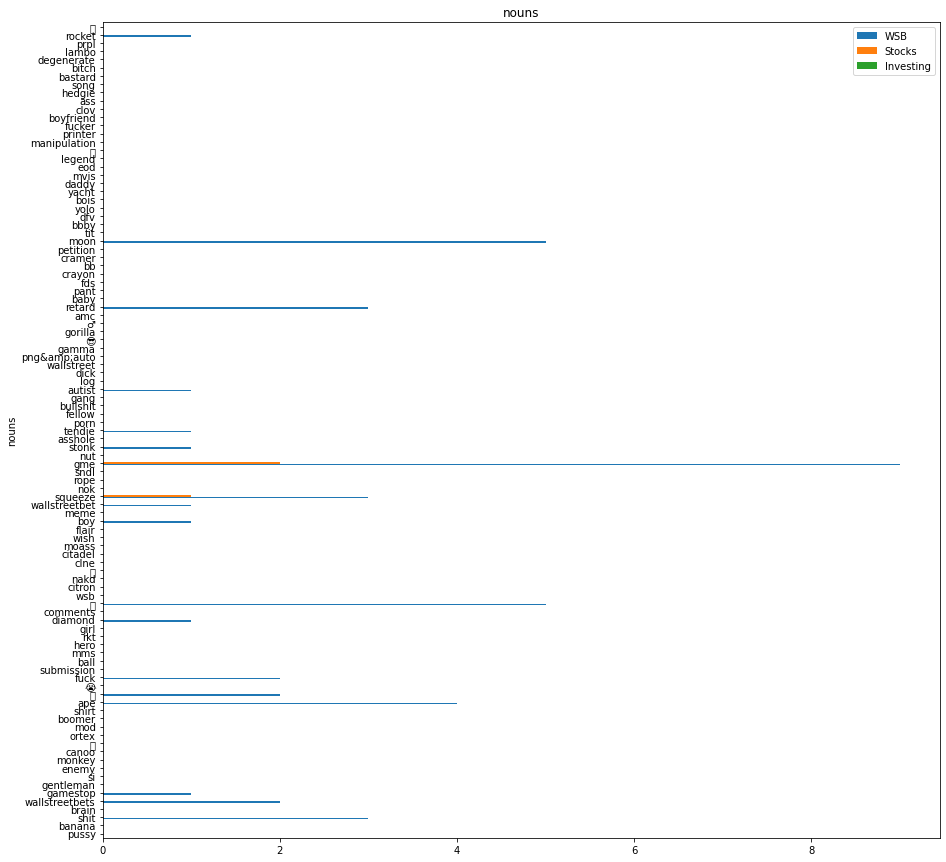

In [15]:
 # ((count1 > (1.1*(count3+count2)) )and (count1 >=0.10)) 
           
plot_features_diff('nouns',eval(wsb_combined['nouns'].tolist()[0])
              ,eval(stocks_all['nouns'].tolist()[0])
              ,eval(investing_all['nouns'].tolist()[0]),0,10000)

['shill', 'smooth', 'gamestop', 'piss', 'fuck', 'fucking', 'proud', 'autistic', '💎', 'hodl', 'damn', 'papa', 'fellow', 'retarded', 'bullshit', '\u200d', 'dirty', 'gay', 'sweet', 'shitty', 'amc', 'yolo', '🐻', 'shorter', 'shorted', 'broke', 'vlad', 'fat']


C:\Users\96ank\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Could not cast to int32, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  


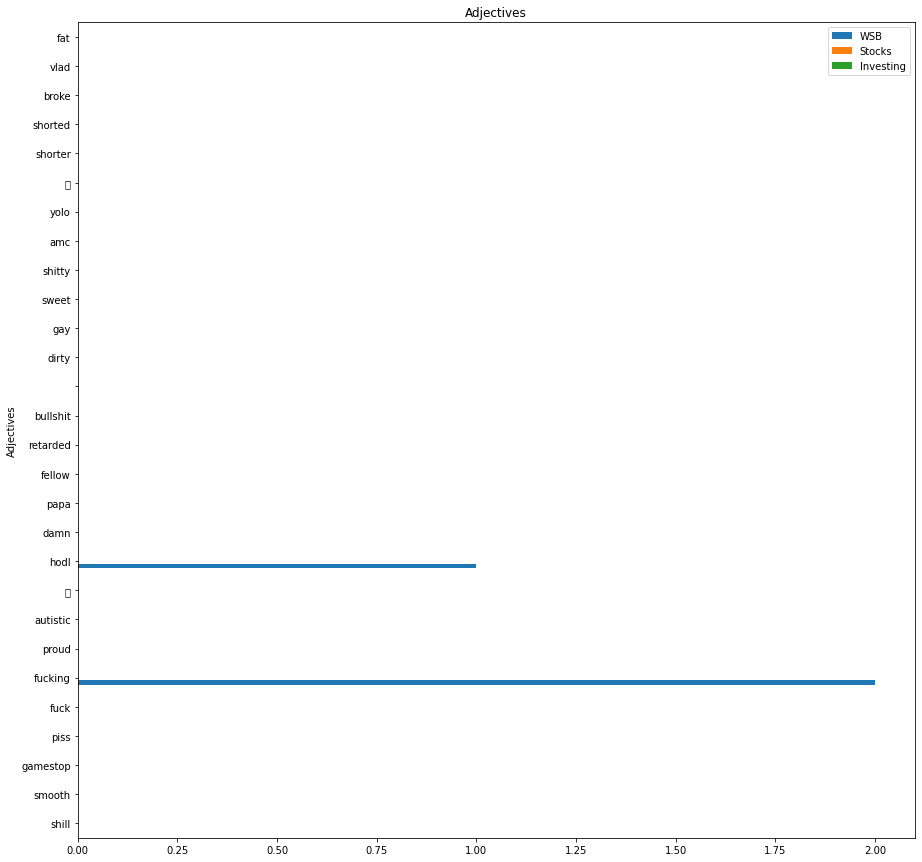

In [16]:
 # ((count2 > (1.1*(count3+count1)) )and (count2 >=0.10)) 
         
        
plot_features_diff('Adjectives',eval(wsb_combined['adjectives'].tolist()[0])
              ,eval(stocks_all['adjectives'].tolist()[0])
              ,eval(investing_all['adjectives'].tolist()[0]),0,10000)

In [25]:

             #(count2 > (2*(count1+count3)) )and (count2 >=0.25 )
 
plot_features_diff('Adjectives',eval(wsb_combined['adjectives'].tolist()[0])
              ,eval(stocks_all['adjectives'].tolist()[0])
              ,eval(investing_all['adjectives'].tolist()[0]),0,10000)

['neutral', 'overbought', 'overweight', 'elevated', 'thermal', 'discuss', 'aggregated', 'higher', 'paysafe', 'confirm', 'helpful', 'evergrande', 'pre', 'notable', 'oversell', 'fourth', 'rivian', 'royal', 'upcoming', 'cloudflare', 'galactic', 'unattractive', 'therapeutic', 'market', 'tech', 'sticky', 'discretionary', 'aggregate', 'overlook', 'themed', 'ep', 'sudden']


In [26]:
      #(count2 > (2*(count1+count3)) )and (count2 >=0.25 )
plot_features_diff('Verbs',eval(wsb_combined['verbs'].tolist()[0])
              ,eval(stocks_all['verbs'].tolist()[0])
              ,eval(investing_all['verbs'].tolist()[0]),0,10000)

['revise', 'upgrade', 'earning', 'plug', 'draftking', 'stock', 'chat', 'discuss', 'click', 'thought', 'rate', 'eps', 'taper', 'undervalue', 'pricing', 'reiterate']


In [27]:
      #(count2 > (2*(count1+count3)) )and (count2 >=0.25 )
plot_features_diff('Nouns',eval(wsb_combined['nouns'].tolist()[0])
              ,eval(stocks_all['nouns'].tolist()[0])
              ,eval(investing_all['nouns'].tolist()[0]),0,1000)

['disney', 'release', 'earning', 'estimate', 'msft', 'consensus', 'sentiment', 'semiconductor']


In [37]:

             # ((count3 > (1.1*(count1+count2)) )and (count3 >=0.10 ))
 
plot_features_diff('Adjectives',eval(wsb_combined['adjectives'].tolist()[0])
              ,eval(stocks_all['adjectives'].tolist()[0])
              ,eval(investing_all['adjectives'].tolist()[0]),0,10000)

['passive', 'underlie', 'useful', 'taxable', 'personal', 'old', 'foreign', 'registered', 'liquid', 'expensive', 'wealthy', 'invest', 'aware', 'proper', 'traditional', 'forex', 'diversified', 'specific', 'relevant', 'token', 'appropriate', 'mutual', 'international', 'leveraged', 'intelligent', 'rental', 'down', 'intrinsic', 'crypto', 'aggressive', 'minimum']


In [38]:
      # ((count3 > (1.1*(count1+count2)) )and (count3 >=0.10 ))
plot_features_diff('Verbs',eval(wsb_combined['verbs'].tolist()[0])
              ,eval(stocks_all['verbs'].tolist()[0])
              ,eval(investing_all['verbs'].tolist()[0]),0,10000)

['invest', 'yield', 'employ', 'consult', 'acorn', 'risk', 'rent', 'earn', 'warrant', 'mind', 'retire', 'time', 'allocate', 'bitcoin', 'dividend', 'withdraw', 'investing', 'saving', 'emerge', 'max', 'calculate', 'contribute']


In [41]:

             # ((count3 > (1.1*(count1+count2)) )and (count3 >=0.10 ))
 
plot_features_diff('Nouns',eval(wsb_combined['nouns'].tolist()[0])
              ,eval(stocks_all['nouns'].tolist()[0])
              ,eval(investing_all['nouns'].tolist()[0]),0,10000)

['ira', 'starting', 'retirement', 'vti', 'lending', 'tolerance', 'investment', 'etfs', 'roi', 'income', 'tax', 'bitcoin', 'schwab', 'investing', 'lump', 'cryptocurrency', 'book', 'emerge', 'rep', 'fix', 'rebalancing', 'instrument', 'treasury', 's&amp;p500', 'bond', 'answer', 'sort', 'dca', 'mortgage', 'loan', 'compound', 'asset', 'citizen', 'redditor', 'employer', 'return', 'downturn', 'blockchain', 'allocation', 'debt', 'apartment', 'robo', 'reit', 'emergency', 'cd', 'currency', 'fee', 'pension', 'podcast', 'exposure', 'decision', 'berkshire', 'maturity', 'invest', 'yield', 'fund', 'age', 'accounting', 'index', 'contribution', 'tariff', 'roth', 'cryptocurrencie', 'horizon', 'btc', 'objective', 'blackjack', 'voo', 'equity', 'withdrawal', 'saving', 'startup', 'commission', 'salary', 'recession', 'house', 'commentary', 'sp500', 'sum', 'wealth', 'vanguard', 'etf', 'match', 'girlfriend', 'manager', 'thread', '401k', 'holding', 'faq', 'crypto', 'penalty', 'curve', 'sidebar', 'diversificatio

In [29]:
unique_wsb_bow = []
unique_stocks_bow = []
unique_investing_bow = []

In [30]:
import re
def set_diff_operations_by_feature(feature1_keys,feature2_keys,feature3_keys,feature_name):
    #print(feature1_keys)
    #special_characters = ""!@$%^&*()-+?_=,<>/""
    regex = re.compile('[@_!#%^&*;\\ \-()<>?/\|}{~:^0-9\\\]') 
    unique_wsb_bow =list((set(feature1_keys) - set(feature2_keys)) & (set(feature1_keys) - set(feature3_keys)))
    unique_stocks_bow = list((set(feature2_keys) - set(feature1_keys)) & (set(feature2_keys) - set(feature3_keys)))
    unique_investing_bow = list((set(feature3_keys) - set(feature2_keys)) & (set(feature3_keys) - set(feature1_keys)))
    
    print("Unique in WSB:",)# unique_wsb_bow[:10])
    global_dict = dict([item for item in eval(wsb_combined[feature_name].tolist()[0])[:10000] if (item[0] in unique_wsb_bow and regex.search(item[0]) == None)])
    print("Unique in WSB:", len(global_dict))
    print(list(list(zip(*sorted(global_dict.items(), key=lambda item: item[1], reverse = True)[:100])))[0])
    #print([item for item in bag_of_words_wsb if item[0] in unique_wsb_bow][:10])
    print()
   
    
    print("Unique in Stocks:",)# unique_stocks_bow[:10])
    global_dict = dict([item for item in eval(stocks_all[feature_name].tolist()[0])[:10000] if (item[0] in unique_stocks_bow and regex.search(item[0]) == None)])
    print("Unique in Stocks:",len(global_dict))
    print(list(list(zip(*sorted(global_dict.items(), key=lambda item: item[1], reverse = True)[:100])))[0])
    print()
  
  
   
    print("Unique in Investing:",)# unique_investing_bow[:10])
    global_dict = dict([item for item in eval(investing_all[feature_name].tolist()[0])[:10000] if (item[0] in unique_investing_bow and regex.search(item[0]) == None)])
    print("Unique in Investing:", len(global_dict))
    print(list(list(zip(*sorted(global_dict.items(), key=lambda item: item[1], reverse = True)[:100])))[0])
    
   

In [31]:
set_diff_operations_by_feature(set(list(list(zip(*eval(wsb_combined['nouns'].tolist()[0])[:10000]))[0])),
                     set(list(list(zip(*eval(stocks_all['nouns'].tolist()[0])[:10000]))[0])),
                     set(list(list(zip(*eval(investing_all['nouns'].tolist()[0])[:10000]))[0])),
                              'nouns')

Unique in WSB:
Unique in WSB: 1617
('🙌', '✋', '🤚', '🍌', 'wsbvotebot', 'shitposting', '🦍', 'valhalla', 'cuck', 'retards', 'cock', 'guh', 'contentguide', '🐂', '\u200d', 'fuckery', 'sld', 'tard', 'retardation', 'degen', 'img', '👊', 'shitron', 'cum', 'stimmy', '💦', '🍆', 'comrade', 'europoor', 'chad', 'dildo', '🏳', 'faggot', 'gainz', 'tendieman', 'moooooon', 'og', '🍋', 'penis', '🖕', 'hodle', 'impersonator', 'fucking', '👐', 'harambe', 'mooning', 'shitadel', 'cucke', '🛰', '🥵', 'scum', 'opad', 'cheek', 'uranus', '🌌', 'chimp', '🇸', '🏿', 'popeye', 'prophet', 'tribute', 'trendie', 'chromosome', '👎', 'mascot', '😍', 'wsber', '🧑', 'lube', '❤', '👩', 'mooooooon', '🧻', '🐵', 'lord', '🎶', 'bionano', 'tothemoon', 'despac', '🤯', '🍺', 'monke', 'robbinghood', 'squoze', '😤', '✊', 'butthole', '🌚', '💩', 'eater', 'caption', 'papa', 'tendy', '😡', 'paperhand', 'dipshit', '👆', '🆘', '🍿', 'zoo')

Unique in Stocks:
Unique in Stocks: 1266
('streetinsider', 'psychomarket', 'kulr', 'aaii', 't.b.a', 'ichimoku', 'wtd', 'st

In [32]:
set_diff_operations_by_feature(set(list(list(zip(*eval(wsb_combined['tickers'].tolist()[0])[:10000]))[0])),
                     set(list(list(zip(*eval(stocks_all['tickers'].tolist()[0])[:10000]))[0])),
                     set(list(list(zip(*eval(investing_all['tickers'].tolist()[0])[:10000]))[0])),
                              'tickers')

Unique in WSB:
Unique in WSB: 810
('BFS', 'LIDR', 'HOWL', 'RCON', 'TPST', 'MORN', 'ARMK', 'BME', 'RETA', 'OSH', 'HLTH', 'GATO', 'CCRN', 'EDD', 'HIPO', 'MTC', 'MOXC', 'STG', 'OGE', 'ATIP', 'AAIC', 'ECVT', 'DRRX', 'GROY', 'ELA', 'YGMZ', 'MOH', 'PAM', 'HGH', 'CASI', 'BALY', 'MFIN', 'BZ', 'CABO', 'GPK', 'LOB', 'DTF', 'CLBT', 'INFN', 'NGS', 'NXTP', 'OCA', 'ISIG', 'BIOX', 'ZIXI', 'FFA', 'PRCH', 'FREE', 'BKI', 'MMYT', 'VIEW', 'CHH', 'MUR', 'DXLG', 'CODA', 'WNS', 'OBLG', 'OCUL', 'TMQ', 'WLK', 'KORE', 'GPRE', 'AXLA', 'PHIO', 'ADEX', 'MRC', 'RERE', 'AMPS', 'FTCI', 'VWE', 'PRQR', 'EGHT', 'ZVIA', 'VWTR', 'SOHU', 'NPTN', 'NPO', 'RNAZ', 'CFLT', 'INDP', 'GAMB', 'CVLT', 'KEP', 'VEV', 'TBLA', 'PKX', 'VIRI', 'HTGM', 'FOR', 'SWIR', 'HBM', 'DBD', 'OXM', 'ARCO', 'PLAN', 'ARE', 'NHTC', 'MBUU', 'AM', 'MCI')

Unique in Stocks:
Unique in Stocks: 271
('BPT', 'BRPM', 'NMIH', 'BOMN', 'EVAX', 'HCSG', 'ENLC', 'SMIT', 'CJJD', 'ATRO', 'KALV', 'IMRA', 'BMTX', 'EXFY', 'PBT', 'NLTX', 'TTP', 'OESX', 'ELMD', 'RMNI', 'UTSI

In [33]:
set_diff_operations_by_feature(set(list(list(zip(*eval(wsb_combined['adjectives'].tolist()[0])[:10000]))[0])),
                     set(list(list(zip(*eval(stocks_all['adjectives'].tolist()[0])[:10000]))[0])),
                     set(list(list(zip(*eval(investing_all['adjectives'].tolist()[0])[:10000]))[0])),
                              'adjectives')

Unique in WSB:
Unique in WSB: 2332
('nigger', '✋', 'hedgie', 'tard', 'irnt', '🧻', 'donny', '🌚', '💪', 'deepfuckingvalue', 'yachty', 'controlthenarrative', '🌔', '🤲', '🦍', 'tendie', '😌', 'chad', '😘', 'gamestahp', '🛰', 'shitpost', 'nutshell', '👋', 'milky', '🥜', 'booty', 'despac', 'motherfucke', 'deez', 'moooon', 'wrinkly', 'squoze', 'unbreakable', 'fu', 'retarted', 'nude', 'citadel', '😂', 'fuk', 'linus', 'wendys', 'fuckery', 'fibo', 'gaybear', 'finna', 'sellin', 'unch', 'cucke', 'slv', 'faggy', 'retarte', 'mooon', 'hoooold', '☄', '✊', 'puny', '🐜', 'blonde', '🇷', 'johnny', 'mumble', 'yell', 'pow', '🤘', 'sleazy', 'fucktards', 'paperhand', 'ded', 'mammal', 'tarde', 'puss', 'lolz', 'intergalactic', 'adorable', '˚', 'refuel', '🚧', 'nonfactual', 'ez', '😢', '🏼', 'europoor', 'spamme', 'puppy', 'endgame', '\U0001f9a7', 'runnin', 'dusty', 'tingle', 'haired', 'shareslatest', 'frontdoor', 'bitch', 'boiz', '🇵', 'dipshit', 'palantard', 'disrespect', 'apetard')

Unique in Stocks:
Unique in Stocks: 1890
(

In [34]:
set_diff_operations_by_feature(set(list(list(zip(*eval(wsb_combined['verbs'].tolist()[0])[:10000]))[0])),
                     set(list(list(zip(*eval(stocks_all['verbs'].tolist()[0])[:10000]))[0])),
                     set(list(list(zip(*eval(investing_all['verbs'].tolist()[0])[:10000]))[0])),
                              'verbs')

Unique in WSB:
Unique in WSB: 2914
('🌈', '\U0001f90e', '⣿', 'ape', '�', 'goooooo', '🏳', '🌝', 'tard', '🍆', 'diamondhand', 'revs', 'dumbass', 'holdin', 'handed', '🧻', 'cum', 'gooooooo', 'dfv', 'saturn', 'fucken', '🤠', "yolo'd", 'pluto', 'yolo’d', 'snort', '🤚', 'masturbate', 'nut', 'gay', 'shitpost', 'coo', 'art', '👐', '🖕', 'boyz', 'deepfuckingvalue', 'expr', 'cunt', 'shitadel', 'fke', 'tendieland', 'gang', 'viking', 'motherfucker', 'paperhande', 'dipshit', 'faggot', '🖐', '🗑', 'immortalize', 'begat', 'emoji', 'flaire', 'pamp', '⠁', 'done', 'clench', 'cream', 'boutta', 'yo', 'colorize', 'cock', '🤤', 'squeezy', 'ass', 'cya', 'shortie', 'trendie', '🐵', 'goodnight', 'shithead', '🍋', '😫', '🌚', '🍰', 'mfer', 'reload', 'cucke', 'unpin', '💪', 'commentposte', 'leaving', 'slurp', 'cumme', 'united', 'tking', '🥰', 'rtrd', '✨', 'boyfriend', 'vxa', 'valhalla', '🌘', 'billboard', 'saiyan', 'mod', '🐂', 'holdtheline', 'hooooold')

Unique in Stocks:
Unique in Stocks: 2431
('expensify', 'cibr', 'fredsavesgran

In [35]:
def set_diff_operations_(feature1_keys,feature2_keys,feature3_keys):
    #special_characters = ""!@$%^&*()-+?_=,<>/""
    regex = re.compile('[@_!#%^&*;\\ \-()<>?/\|}{~:^0-9\\\]') 
    unique_wsb_bow =list((set(feature1_keys) - set(feature2_keys)) & (set(feature1_keys) - set(feature3_keys)))
    unique_stocks_bow = list((set(feature2_keys) - set(feature1_keys)) & (set(feature2_keys) - set(feature3_keys)))
    unique_investing_bow = list((set(feature3_keys) - set(feature2_keys)) & (set(feature3_keys) - set(feature1_keys)))
   
    print("Unique in WSB:",)# unique_wsb_bow[:10])
    global_dict = dict([item for item in bag_of_words_wsb if (item[0] in unique_wsb_bow and regex.search(item[0]) == None)])
    print("Unique in WSB:", len(global_dict))
    print(list(list(zip(*sorted(global_dict.items(), key=lambda item: item[1], reverse = True)[:100])))[0])
    #print([item for item in bag_of_words_wsb if item[0] in unique_wsb_bow][:10])
    print()
   
    
    print("Unique in Stocks:",)# unique_stocks_bow[:10])
    global_dict = dict([item for item in bag_of_words_stocks if (item[0] in unique_stocks_bow and regex.search(item[0]) == None)])
    print("Unique in Stocks:",len(global_dict))
    print(list(list(zip(*sorted(global_dict.items(), key=lambda item: item[1], reverse = True)[:100])))[0])
    print()
  
  
   
    print("Unique in Investing:",)# unique_investing_bow[:10])
    global_dict = dict([item for item in bag_of_words_investing if (item[0] in unique_investing_bow and regex.search(item[0]) == None)])
    print("Unique in Investing:", len(global_dict))
    print(list(list(zip(*sorted(global_dict.items(), key=lambda item: item[1], reverse = True)[:100])))[0])

In [36]:
set_diff_operations_(set(list(list(zip(*bag_of_words_wsb[:]))[0])),set(list(list(zip(*bag_of_words_stocks[:]))[0])),set(list(list(zip(*bag_of_words_investing[:]))[0])))

Unique in WSB:
Unique in WSB: 1406
('👐', '🤲', '✋', 'autistic', '🍌', '🤚', 'autism', '🏽', 'fucker', 'img', 'tard', '🖐', 'bois', 'deepfuckingvalue', 'retards', 'nigger', 'pussy', '🌑', '✊', '🤡', 'bastard', '\U0001f9a7', 'wsbvotebot', '👏', 'yoloe', '🖕', 'cuck', 'hodle', 'moass', '👋', 'motherfucker', 'chad', '😤', 'pluto', 'shitposting', 'gainz', 'gorilla', 'revs', 'valhalla', 'tattoo', '🛸', '🍆', 'guh', '🥜', '✨', 'stimmy', 'shitron', '💩', 'lad', '🇺', 'cock', 'squoze', '🤝', '🧻', 'dildo', '💦', 'yacht', 'aoc', '️\u200d', 'hfs', 'fuk', 'shitpost', 'lfg', 'irnt', '👨', 'og', '🇸', 'mnmd', 'bf', '🏳', '🐂', '😈', 'yolo’d', '🤬', '😡', 'eow', 'gamestonk', '🤦', "yolo'd", 'goddamn', '👌', '🏻\u200d', '🐒', 'jerk', 'glorious', 'godspeed', '🍿', 'contentguide', 'monke', 'fuckery', '🌖', 'goooo', 'billboard', 'cum', '🍗', '😳', 'degen', 'wrinkle', 'becky', 'bigly')

Unique in Stocks:
Unique in Stocks: 771
('streetinsider', 'market+check', 'kulr', 'lplresearch.com', 'aggregated', 'tcgyt', 'psychomarket', 'eri', 'unattr

In [3]:
eval(wsb_combined['tickers'].tolist()[0])[:30]

[('GME', 6.728153807591976),
 ('AMC', 3.3868212664432455),
 ('BB', 1.305596041552558),
 ('NOK', 0.8876103565759057),
 ('RH', 0.8659103779277564),
 ('TSLA', 0.8167082873030757),
 ('PLTR', 0.7377992740370779),
 ('CLOV', 0.3501007250345807),
 ('NIO', 0.3267761490544844),
 ('SNDL', 0.313547285065773),
 ('TD', 0.3079772370705261),
 ('SPCE', 0.2997382077442234),
 ('COIN', 0.2953285864146529),
 ('AMD', 0.2817515944262386),
 ('HOOD', 0.2561061651147894),
 ('RKT', 0.2427612584595104),
 ('AAPL', 0.21641957314865531),
 ('KIDS', 0.21189390915251718),
 ('UK', 0.20934097048802905),
 ('SHIP', 0.1954158504999118),
 ('NAKD', 0.1828832425106063),
 ('MSFT', 0.18125864517865928),
 ('APPS', 0.18033030384611815),
 ('FAT', 0.1616474345287275),
 ('EYES', 0.147490229207475),
 ('AMZN', 0.14679397320806914),
 ('WISH', 0.1384389012151988),
 ('AIR', 0.13785868788236058),
 ('BLUE', 0.13693034654981945),
 ('BABA', 0.13379719455249306)]

In [10]:
eval(wsb_combined['tickers'].tolist()[0])[30:50]

[('CUZ', 0.1312442558880049),
 ('SELF', 0.13078008522173434),
 ('SPOT', 0.12729880522470502),
 ('BOOM', 0.12497795189335215),
 ('MASS', 0.12439773856051392),
 ('JOBS', 0.12370148256110806),
 ('LAND', 0.12149667189632284),
 ('MVIS', 0.11929186123153762),
 ('TLRY', 0.1176672638995906),
 ('GLAD', 0.11708705056675238),
 ('ATH', 0.11592662390107594),
 ('DIS', 0.11546245323480538),
 ('DOW', 0.11488223990196715),
 ('USA', 0.11453411190226423),
 ('AKA', 0.11441806923569658),
 ('LMAO', 0.1141859839025613),
 ('WKHS', 0.11372181323629073),
 ('GRAB', 0.11360577056972307),
 ('EARN', 0.11256138657061428),
 ('LAW', 0.112329301237479)]

In [4]:
eval(stocks_all['tickers'].tolist()[0])[:30]

[('GME', 1.3779400152744876),
 ('AMC', 0.8498051855591369),
 ('TSLA', 0.7462493365953426),
 ('NIO', 0.6983547564495877),
 ('AMD', 0.5106597802027105),
 ('AAPL', 0.507423659922592),
 ('TD', 0.42587342886360396),
 ('MSFT', 0.4206956364154143),
 ('PLTR', 0.3922177779503709),
 ('BABA', 0.32620092423595204),
 ('AMZN', 0.29772306577090857),
 ('AIR', 0.280895240314292),
 ('RH', 0.2647146389136991),
 ('BB', 0.2485340375131063),
 ('PLUG', 0.2459451412890114),
 ('AI', 0.2258811955522763),
 ('DOW', 0.22393952338420514),
 ('DKNG', 0.21876173093601545),
 ('NVDA', 0.21811450687999173),
 ('FORD', 0.21617283471192056),
 ('NOK', 0.20322835359144628),
 ('UBER', 0.20322835359144628),
 ('DIS', 0.20322835359144628),
 ('FB', 0.20258112953542257),
 ('SPCE', 0.20063945736735145),
 ('BOOM', 0.19675611303120916),
 ('ROSE', 0.18316440785471114),
 ('ALOT', 0.17475049512640287),
 ('SQ', 0.17086715079026057),
 ('SPOT', 0.16633658239809457)]

In [7]:
ticks=['PLUG','DKNG','NVDA','FORD','SPOT','UBER','FB','RELY']

[item for item in eval(wsb_combined['tickers'].tolist()[0])[:3000] if item[0] in ticks]

[('SPOT', 0.12729880522470502),
 ('FB', 0.11058866123896435),
 ('UBER', 0.1094282345732879),
 ('PLUG', 0.10142129058012049),
 ('FORD', 0.09817209591622647),
 ('NVDA', 0.07763254393375357),
 ('DKNG', 0.06161865594741875),
 ('RELY', 0.05628069328530714)]

In [9]:
ticks=['PLUG','DKNG','NVDA','FORD','SPOT','UBER','FB','RELY','HOOD','NOK','CLOV','SNDL','SPCE','COIN']

[item for item in eval(stocks_all['tickers'].tolist()[0])[:3000] if item[0] in ticks]

[('PLUG', 0.2459451412890114),
 ('DKNG', 0.21876173093601545),
 ('NVDA', 0.21811450687999173),
 ('FORD', 0.21617283471192056),
 ('NOK', 0.20322835359144628),
 ('UBER', 0.20322835359144628),
 ('FB', 0.20258112953542257),
 ('SPCE', 0.20063945736735145),
 ('SPOT', 0.16633658239809457),
 ('SNDL', 0.16245323806195228),
 ('RELY', 0.1398003961011223),
 ('HOOD', 0.08802247161922515),
 ('CLOV', 0.07637243861079829),
 ('COIN', 0.013591705176498)]

In [10]:
ticks=['PLUG','DKNG','NVDA','FORD','SPOT','UBER','FB','RELY','HOOD','NOK','CLOV','SNDL','SPCE','COIN','BB','PLTR','']

[item for item in eval(investing_all['tickers'].tolist()[0])[:3000] if item[0] in ticks]

[('COIN', 0.2770625112507729),
 ('SPOT', 0.22853743865882964),
 ('UBER', 0.22384146389186735),
 ('FB', 0.18627366575616933),
 ('RELY', 0.1847083408338486),
 ('FORD', 0.17296840391644294),
 ('PLTR', 0.12835664363030155),
 ('PLUG', 0.11583404425173556),
 ('BB', 0.10722475717897142),
 ('NVDA', 0.10565943225665068),
 ('HOOD', 0.1017461199508488),
 ('SPCE', 0.08452754580532054),
 ('NOK', 0.0759182587325564),
 ('SNDL', 0.044611760286141396),
 ('DKNG', 0.04069844798033952),
 ('CLOV', 0.019566561529009385)]

In [11]:
eval(investing_all['tickers'].tolist()[0])[:50]

[('EARN', 0.6918736156657718),
 ('GME', 0.6770030289037247),
 ('UK', 0.5932581455595646),
 ('TD', 0.565082296957791),
 ('TSLA', 0.5455157354287816),
 ('APPS', 0.4750761139243479),
 ('SUM', 0.44455227793909324),
 ('DOW', 0.4093324671868763),
 ('PAYS', 0.39289655550250846),
 ('RENT', 0.3748953188958198),
 ('JOBS', 0.3678513567453764),
 ('BLUE', 0.34906745767752745),
 ('AAPL', 0.3326315459931595),
 ('USA', 0.32871823368735764),
 ('SELF', 0.3201089466145935),
 ('AMD', 0.3028903724690653),
 ('COIN', 0.2770625112507729),
 ('WASH', 0.2762798487896125),
 ('LAW', 0.2747145238672918),
 ('AMC', 0.2708012115614899),
 ('MSFT', 0.26610523679452763),
 ('ROSE', 0.2551479623382824),
 ('AI', 0.2410600380373956),
 ('AMZN', 0.235581400809273),
 ('LAND', 0.23245075096463147),
 ('PATH', 0.23245075096463147),
 ('KIDS', 0.23166808850347112),
 ('AIR', 0.23010276358115034),
 ('SPOT', 0.22853743865882964),
 ('NIO', 0.22462412635302775),
 ('UBER', 0.22384146389186735),
 ('GDP', 0.22227613896954662),
 ('TEN', 0.22

In [40]:
emojis=['⏰','🤬','😍','🦅','🙌','✋','🚀','☀','🤷','🔥','👋','👀','🦍','hold','ETF','ETFs','etf','etfs']

[item for item in bag_of_words_wsb if item[0] in emojis]

[['🚀', 48.64311309982454],
 ['hold', 10.825040150762632],
 ['☀', 0.02703794131026096],
 ['🙌', 3.0454237414012386],
 ['🔥', 0.771335604675127],
 ['🦍', 2.8880698855355136],
 ['etf', 0.5299668582144282],
 ['✋', 0.6139817488094023],
 ['🤷', 0.1538725758686954],
 ['👀', 0.2302286504702049],
 ['🤬', 0.08714804259230033],
 ['👋', 0.1322886398871137],
 ['etfs', 0.27861844242891226],
 ['😍', 0.06359138127906869],
 ['🦅', 0.013112821322143725]]

In [41]:
[item for item in bag_of_words_stocks if item[0] in emojis]

[['etfs', 2.9461639030199476],
 ['etf', 4.061330951548807],
 ['hold', 8.588663223434688],
 ['🚀', 2.0646447387156486],
 ['🙌', 0.05630849287406314],
 ['🔥', 0.17928106351856885],
 ['🤷', 0.024594514128901145],
 ['👀', 0.06860574993851372],
 ['🦍', 0.03689177119335171]]

In [42]:
[item for item in bag_of_words_investing if item[0] in emojis]

[['etf', 7.706877255046216],
 ['hold', 8.052814062879103],
 ['etfs', 6.031979588163013],
 ['🚀', 0.9681534644553843],
 ['🦍', 0.018783899067849007],
 ['🔥', 0.16357645438251847],
 ['🤷', 0.017218574145528256],
 ['🙌', 0.028175848601773513],
 ['👀', 0.02895851106293389]]

In [43]:
bow_lst=['buying','gme','apes','high','short','buy','🚀','💎','long','dd','sell','growth','squeeze','moon','options','cut','call','dividend','dividends', 'etf', 'etfs','apes','ape']
[item for item in bag_of_words_wsb if item[0] in bow_lst]

[['🚀', 48.64311309982454],
 ['buy', 19.718666159173402],
 ['gme', 15.814990855837873],
 ['high', 5.411533712715491],
 ['sell', 10.273373313900054],
 ['moon', 6.393602799877458],
 ['dd', 2.994481010778043],
 ['buying', 0.8832007352463354],
 ['cut', 0.6366100687900927],
 ['short', 12.255614144208543],
 ['growth', 2.188912819465461],
 ['ape', 4.38826947892201],
 ['💎', 8.408451619491455],
 ['long', 5.400625702058133],
 ['etf', 0.5299668582144282],
 ['squeeze', 4.097002385837225],
 ['dividend', 0.7158672100557933],
 ['etfs', 0.27861844242891226],
 ['apes', 0.014505333320955448],
 ['options', 0.019263082650228837]]

In [44]:
[item for item in bag_of_words_stocks if item[0] in bow_lst]

[['etfs', 2.9461639030199476],
 ['etf', 4.061330951548807],
 ['gme', 3.289192652712516],
 ['buy', 26.63974214593608],
 ['cut', 1.2679119257504563],
 ['dividend', 5.014044762015715],
 ['short', 8.917453043894735],
 ['moon', 0.8413912728308286],
 ['sell', 14.914631147010471],
 ['high', 11.484343650084787],
 ['long', 11.657152473043118],
 ['💎', 0.17733939135049773],
 ['🚀', 2.0646447387156486],
 ['ape', 0.13462260365293258],
 ['growth', 8.237867785069836],
 ['dd', 2.349423323366083],
 ['squeeze', 1.5850517132020765],
 ['buying', 1.3960622888431518],
 ['options', 0.016180601400592857]]

In [45]:
[item for item in bag_of_words_investing if item[0] in bow_lst]

[['etf', 7.706877255046216],
 ['sell', 13.80225250256322],
 ['long', 13.86486549945605],
 ['buy', 25.337131855144833],
 ['dividend', 7.970634504457262],
 ['etfs', 6.031979588163013],
 ['growth', 8.526324851881128],
 ['short', 7.544866125586018],
 ['high', 12.50772879180396],
 ['moon', 0.3694166816676972],
 ['gme', 1.3696593070306569],
 ['squeeze', 0.6809163412095266],
 ['cut', 1.8165595723532313],
 ['buying', 1.0871181585517613],
 ['dd', 1.1481658305222706],
 ['💎', 0.11035540702361293],
 ['🚀', 0.9681534644553843],
 ['ape', 0.03913312305801877],
 ['options', 0.02191454891249051]]

In [46]:
bow_lst2=['option','commodity','longterm','risky','go','safe','crypto','dogecoin']
[item for item in bag_of_words_wsb if item[0] in bow_lst2]

[['option', 6.096417530797724],
 ['crypto', 0.20191423982769985],
 ['dogecoin', 0.29498045841495],
 ['safe', 0.5948347088257411],
 ['commodity', 0.22210566381046984],
 ['risky', 0.24310938645921332],
 ['longterm', 0.028198367975937392]]

In [47]:
[item for item in bag_of_words_stocks if item[0] in bow_lst2]

[['safe', 1.6776047532134675],
 ['longterm', 0.16115878994990487],
 ['risky', 0.7980272610772398],
 ['crypto', 0.7054742210658486],
 ['option', 7.672193960105108],
 ['commodity', 0.46859021656116917],
 ['dogecoin', 0.235589556392632]]

In [48]:
[item for item in bag_of_words_investing if item[0] in bow_lst2]

[['option', 8.96618115505326],
 ['crypto', 2.769059787585408],
 ['safe', 3.1431724440200677],
 ['longterm', 0.1267913187079808],
 ['risky', 1.1004234203914878],
 ['commodity', 0.9877200259843937],
 ['dogecoin', 0.2371467257315937]]

In [49]:
bow_lst3=['sp500','dow','musk','elon','bezos','warren','buffet',
          'index','fund','s&p500','bullish','bearish','musk','🦍',
         's&amp;p500']

[item for item in bag_of_words_wsb if item[0] in bow_lst3]

[['index', 0.6424122021184749],
 ['bullish', 1.036028927115922],
 ['elon', 1.1400031563605306],
 ['warren', 0.17301961585235662],
 ['🦍', 2.8880698855355136],
 ['fund', 3.3959886371020898],
 ['musk', 0.5979678608230674],
 ['sp500', 0.05964593061576881],
 ['dow', 0.23858372246307524],
 ['bezos', 0.09353038925352074],
 ['buffet', 0.13693034654981945],
 ['bearish', 0.3482440423694984],
 ['s&amp;p500', 0.07299083727104781]]

In [50]:
[item for item in bag_of_words_stocks if item[0] in bow_lst3]

[['warren', 0.39545389823048943],
 ['buffet', 0.2815424643703157],
 ['fund', 5.566774105859967],
 ['index', 3.4988932468641996],
 ['bearish', 0.6122739569984337],
 ['sp500', 0.26406741485767543],
 ['bullish', 1.603821210826764],
 ['dow', 0.9320026406741486],
 ['elon', 0.5727932895809872],
 ['musk', 0.5928572353177223],
 ['s&amp;p500', 0.3274953723479994],
 ['bezos', 0.12815036309269542],
 ['🦍', 0.03689177119335171]]

In [51]:
[item for item in bag_of_words_investing if item[0] in bow_lst3]

[['sp500', 0.48290273853595156],
 ['fund', 21.149105025475663],
 ['warren', 0.8045770100728659],
 ['bullish', 1.0088519124357238],
 ['index', 8.646072208438667],
 ['bezos', 0.13305261839726382],
 ['dow', 0.8241435716018753],
 ['bearish', 0.46490150192926294],
 ['musk', 0.5642996344966307],
 ['s&amp;p500', 0.8014463602282245],
 ['buffet', 0.5228185240551307],
 ['elon', 0.5048172874484421],
 ['🦍', 0.018783899067849007]]